In [7]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import  FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [11]:
#Load the Dataset
boston_data = load_boston()
print(boston_data.DESCR)

#Put the data in panda dataframe
features = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
print(features)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [15]:
target = pd.DataFrame(boston_data.target,columns=['target'])
print(target)

     target
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
..      ...
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9

[506 rows x 1 columns]


In [16]:
max(target['target'])

50.0

In [22]:
df = pd.concat([target,features],axis=1)

In [23]:
df.describe().round(decimals = 2)

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,22.53,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,9.20,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,5.00,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,17.02,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,21.20,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,25.00,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96
max,50.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [25]:
#to calculate the corelation
corr = df.corr('pearson')
print(corr)

           target      CRIM        ZN     INDUS      CHAS       NOX        RM  \
target   1.000000 -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360   
CRIM    -0.388305  1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN       0.360445 -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS   -0.483725  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS     0.175260 -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX     -0.427321  0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM       0.695360 -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE     -0.376955  0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS      0.249929 -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD     -0.381626  0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX     -0.468536  0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO -0.507787  0.289946 

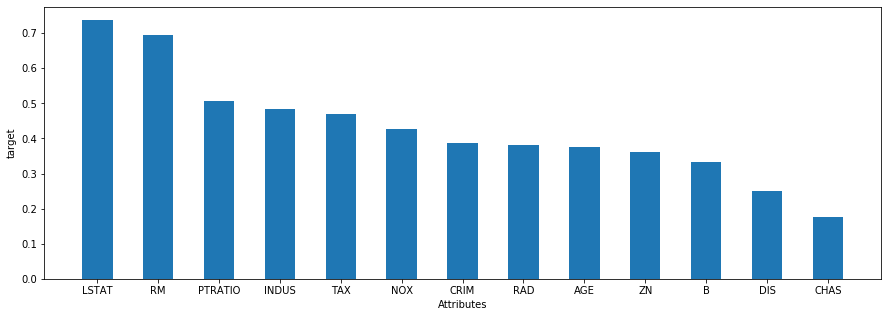

In [32]:
#to find the absolute values in corelation
corrs = [abs(corr[attr]['target'])  for attr in list(features)]

#list of pairs corr and target
l = list(zip(corrs,list(features)))


#sorting the list of pairs in ascending order
l.sort(key = lambda x : x[0] , reverse = True)


corrs, labels = list(zip((*l)))


#plot the correlation in the graph
index = np.arange(len(labels))
plt.figure(figsize = (15,5))
plt.bar(index , corrs ,width = 0.5)
plt.xlabel('Attributes')
plt.ylabel('target')
plt.xticks(index ,labels)
plt.show()
